# Prediction of Defaulting on Credit Cards
#### By Alyssia Goodwin, Nolan Guzman, Alexander Morales

The purpose of this data exploration is to use the attributes given in the UC Irvine data set of "Default of Credit Card Clients Dataset". With this dataset we have explored various ways to predict and find the keys a company could tell if an individual will deafult on paying their credit cards.


### Preprocessing

To start with preprocessing we imported pandas, numpy, matplotlib, seaborn, and various sklearn imports. To get a sense of the data, the first step was to check if there was is nulls in the dataset. Since there is no nulls in the data set, the types of data in the dataframe was outputted so we knew the types in each column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

dat = pd.read_csv("https://raw.githubusercontent.com/alexmorales26/CST463_Project_1/master/default_cc_train.csv")
dat.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [2]:
dat.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default.payment.next.month    int64
dtype: object

After checking the data types of each of the columns, the first notice was at how long the "deafult.payment.next.month" coulmn name was. The name was changed to be "deafult" instead. Also, the ID column was dropped in the dataset since each ID was a different value and did not have relevance for future exploration of the data.

In [3]:
dat.rename(columns={'default.payment.next.month':'default'},inplace=True)
dat.drop('ID',axis=1,inplace=True)

Looking at the overall set of the data, adding a few columns to help for future exploration was the next step. First we added a column called "AvgStatment", this is calculating the average of each of the 6 "Bill_AMT" in the dataset. Bill_AMT expresses the billing statment from September, 2005 to April, 2005. Next, we created a column called "OnTimePayment" to calculate the average of if a person does pay on time or not. The values of -1 or 0 indicate that the individual usually does pay ontime while a number 1 or greater indicates the individual is not likely to pay ontime. Another column we created was was "AvgPayAmt" which expresses the average amount the individual has payed over the six payments that were tracked. Finally, the column "PayDiff" was created to take the difference between the average statement balance and the average payment an individual has.

In [4]:
dat['AvgStatement'] = dat.iloc[:,11:17].mean(axis=1)

dat['OnTimePayment'] = np.ceil(dat.iloc[:,5:11].mean(axis=1))
dat['OnTimePayment'].where(dat['OnTimePayment']!=-0,0,inplace=True)

dat['AvgPayAmt'] = dat.iloc[:,17:23].mean(axis=1)

dat['PayDiff'] = dat['AvgStatement']-dat['AvgPayAmt']

### Data Exploration
Exploring the data within the "EDUCATION" column, the values of 0, 5, and 6 were used but were not given an explanation of what they meant from the dataset analysis. Looking at the explination of the values, the value 4 was expressed as "Other" for education, so the values of 0, 5, and 6 where given the value of 4 to express other education. 

In [5]:
dat['EDUCATION'].value_counts()

2    11682
1     8813
3     4115
5      236
4      106
6       37
0       11
Name: EDUCATION, dtype: int64

In [6]:
dat['EDUCATION'].where(dat['EDUCATION']<4,4,inplace=True)
dat['EDUCATION'].where(dat['EDUCATION']!=0,4,inplace=True)

After adjusting the "EDUCATION" column, the idea of does a limit balance matter base on the education level came into question. After graphing the different levels of education to the limit balance it was apparent to see someone with an education 1 (graduate school), had a higher limit that someone who did not complete graduate school. While the education of 2 (university) and 3 (high schoool) had similar distributions of limit balance, although for university individuals the highest limit balance was a bit higher than those of just high school. Individuals who had the educaiton level of 4 (other) had a wider distubution over the whole dataset 

Text(0, 0.5, 'Limit Balance')

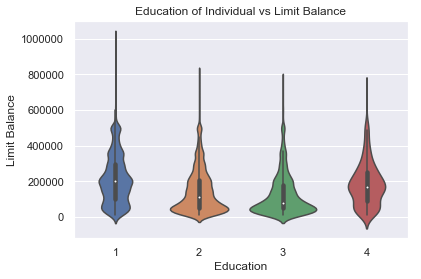

In [7]:
sns.violinplot(dat['EDUCATION'], dat['LIMIT_BAL'])
plt.title("Education of Individual vs Limit Balance")
plt.xlabel("Education")
plt.ylabel("Limit Balance")

After looking at the distributions of limit balance each education level has, the next idea was to see based on education to see if there a difference of the defaulting on a credit card by education level. Looking at the graph, there does not seem to be much correlation to education and deafult. More people who have a university are not likely to deafult but are also the most of deault out of all the groups. 

Text(0.5, 1.0, 'Count of Those who Defaulted on Credit, Sorted by Education')

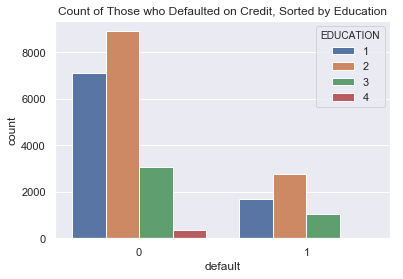

In [8]:
sns.countplot(x='default',hue='EDUCATION',data=dat)
plt.title("Count of Those who Defaulted on Credit, Sorted by Education")

From the dataset, the interest of how many males vs females were in the data set was questioned. After plotting the data, it was able to be seen that there are more females than males in this dataset. 

In [9]:
dat['SEX'].value_counts()

2    15109
1     9891
Name: SEX, dtype: int64

Looking at the sex element, the plot of which sex was more likely to surpass their credit limit and who paid on time. From the graph output it can be seen that more females pay on time in comparison to males. Looking at the graph, more males have deffered payments 3 months or more than females. 

Text(0.5, 1.0, 'Sex of High Credit Users, Sorted by On Time Payment')

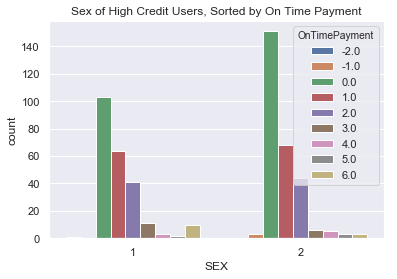

In [10]:
temp = dat[dat['AvgStatement']>dat['LIMIT_BAL']]
sns.countplot(temp['SEX'],hue=temp['OnTimePayment'])
plt.title('Sex of High Credit Users, Sorted by On Time Payment')

Another area of interest was if being on time when paying was able to be reflected with the average payment amount a person pays. Looking at the graph people who paid on time (-2 to 0) points paid a higher amount than those who differed payments (1 to 6).

Text(0.5, 1.0, 'On Time Payment by Average Pay Amount')

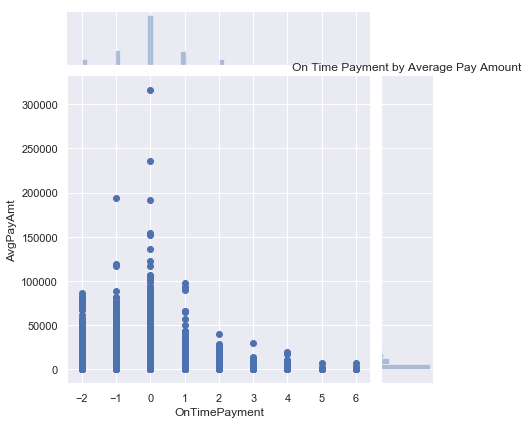

In [14]:
sns.jointplot(dat['OnTimePayment'], dat['AvgPayAmt'])
plt.title('On Time Payment by Average Pay Amount')

After looking at the ontime payment compared to the average payment amount, the idea of how on time payments compare to the payment difference came about. The comparison of people who will pay online and their difference of what their account balance is to what they pay was an interest. The graph below focus' on that exactly. People who pay on time will have a lower pay difference compared to those who do not pay on time. 

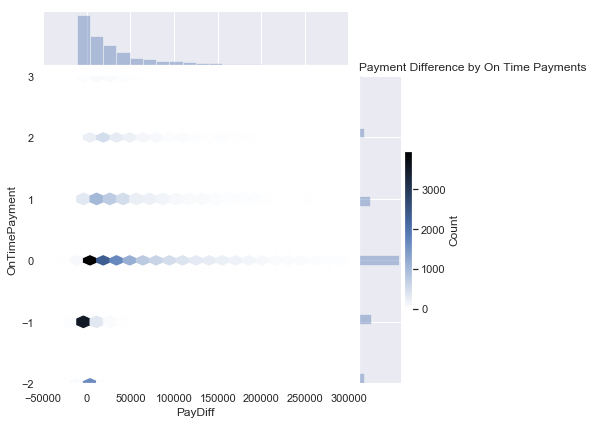

In [16]:
payment = sns.jointplot(x='PayDiff',y='OnTimePayment',data=dat,kind='hex',stat_func=None,ylim=(-2,3),xlim=(-50000,300000))
plt.title('Payment Difference by On Time Payments',loc='left')
legend = plt.colorbar()
legend.set_label('Count')

### Support Vector Machine Analysis

#### Split Data
X was structured with two derived features, and two features that displayed prediction significance in the data exploration.  Y contains the “default” feature from the dataset. The normalization of X will help the training less sensitive to the scale of the features.  The split of the data set will be 70% training data, and 30% will be used as test data. 

In [17]:
X= dat[["AvgStatement","EDUCATION","LIMIT_BAL","PayDiff"]]
y= dat["default"]
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### SVC
The Support Vector Classification is called without any hyperparameters being tweaked. We fit the classifier with the training data sets X_train and y_train. Once the training data is fitted into the classifier, the X_test is passed into classifiers prediction method.  Now that the classifier has predictions based off X_test, the accuracy of the predictions is calculated with the score method with the actual data set y_test.

In [19]:
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict(X_test)
print(svm_clf.score(X_test,y_test))

0.7813333333333333


#### Grid Search
The use of Grid Search gives the best insight on are the best parameters to use with the data set. The param_grid is structured with a list of different parameter combinations. Standard default parameters are applied to the GridSeachCV except for scoring being changed to “accuracy”. Now using GridSearch, fit the training data. The best parameters, and best estimators will be printed onto the console. 

In [20]:
param_grid  = [{'degree':[3,5,7],'kernel':['poly','rbf','sigmoid']}]
GridSearch = GridSearchCV(svm_clf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
GridSearch.fit(X_train,y_train)
print(GridSearch.best_params_)
print(GridSearch.best_estimator_)

{'degree': 3, 'kernel': 'poly'}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Apply best SVC parameters found using Grid Search
Grid Search help find the best estimators, and parameters to apply into the SVC classifier. Therefore, apply these parameter changes to the classifier. Fit the training data into the new classifier and predict once again based off X_test. Compare the accuracy of the predictions and y_test using the score method to see that score is the same as using the default SVC classifier. This concludes that this is as good as SVC will be using the features X contained. 

In [21]:
svm_clf_new = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svm_clf_new.fit(X_train,y_train)
svm_clf_new.predict(X_test)
print(svm_clf_new.score(X_test,y_test))

0.7813333333333333


### What are the best features ?

#### AdaBoost 

still working on this btw... 
only between these four features: "AvgStatement","EDUCATION","LIMIT_BAL","PayDiff"

In [25]:
ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=4),
        n_estimators=200,
        algorithm="SAMME.R", 
        learning_rate=0.5
        )
ada_clf.fit(X_train,y_train)
ada_clf.feature_importances_

array([0.29846581, 0.15363677, 0.22045831, 0.3274391 ])

now between all other features in the dataset

In [23]:
A= dat.drop('default',axis=1)
y= dat["default"]
# we normalize X for better performance
A = normalize(A)
# split the data with 70% being training data, and 30% for test
A_train, A_test, y_train, y_test = train_test_split(A, y, test_size=0.3)
ada_clf2 = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=4),
        n_estimators=200,
        algorithm="SAMME.R", 
        learning_rate=0.5
        )
ada_clf2.fit(A_train,y_train)
print(ada_clf2.feature_importances_)


[0.03756373 0.02141523 0.02841508 0.02769204 0.05723619 0.03938707
 0.02065387 0.01378076 0.01294182 0.01593539 0.01644688 0.06445088
 0.05346148 0.05068901 0.04841057 0.03727085 0.03718935 0.03731711
 0.04775813 0.04154332 0.04687283 0.04541703 0.03645194 0.03913233
 0.02708311 0.03731204 0.05817198]
